In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

In [3]:
#plotting the 2d input array
def plot_data(x, y, ax):
    pos = y==1 #gives 2d array - (6, 1) [[False, False, False, True, True, True]]
    neg = y==0
    pos = pos.reshape(-1,) #reshape the pos to 1d - (6,) - [False, False, False, True, True, True]
    neg = neg.reshape(-1,)
    
    ax.scatter(x[pos, 0], x[pos, 1], label="y=1", marker="X", lw=2, c="r", s=80) #getting pos rows from x1 and x2
    ax.scatter(x[neg, 0], x[neg, 1], label="y=0", marker="o", s=80, facecolors='none', edgecolors="#0096ff", lw=3)
    ax.legend(loc="best")
    
    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

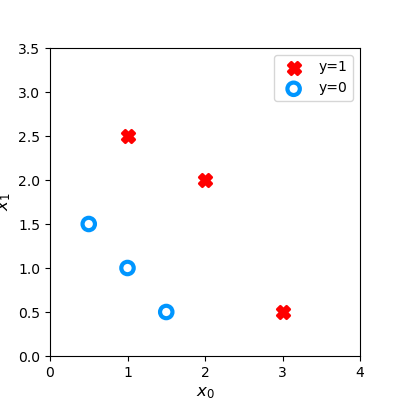

In [4]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])     

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

#### Logistic Loss Cost function
    In a previous lab, you developed the logistic loss function. Recall, loss is defined to apply to one example. Here you combine the losses to form the cost, which includes all the examples.
                    
                    J(w, b) = 1/m Σ LogisticLoss(f(x), y)
                    
                 where Loss(f(x), y) =  -y log(f(x)) - (1-y) (1-log(f(x))


         Recall that f(x) = sigmoid(w.x + b) = g(w.x + b) = 1/ (1+e^-(w.x+b)

    Below Code Description:
    -----------------------
    The algorithm for compute_cost_logistic loops over all the examples calculating the loss for each example and accumulating the total.

    Note that the variables X and y are not scalar values but matrices of shape (m, n) and (m, 1) respectively, where n is the number of features and m is the number of training examples.

In [7]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def compute_cost_logistic(x, y, w, b):
    m, n = x.shape
    cost = 0.0
    for i in range(m):
        z_i = x[i] @ w + b
        f_wb_i = sigmoid(z_i)
        cost += (-y[i] * np.log(f_wb_i)) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost = cost / m
    return cost

x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([1, 1])
b_tmp = -3
cost = compute_cost_logistic(x_train, y_train, w_tmp, b_tmp)
print(cost)

0.36686678640551745


    Example
    -------
    Now, let's see what the cost function output is for a different value of w.

    In a previous lab, you plotted the decision boundary for b=-3, w0=1, w1=1. That is, you had b = -3, w = np.array([1, 1])

    Let's say you want to see if b=-4, w0=1, w1=1 or b = -4, w = np.array([1, 1]) provides a better model.

    Let's first plot the decision boundary for these two different values to see which one fits the data better.

    For b = -3, w = np.array([1, 1]), we'll plot -3 + x0 + x1 = 0 (shown in blue)
    For b = -4, w = np.array([1, 1]), we'll plot -4 + x0 + x1 = 0 (shown in magenta)

In [8]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([1, 1])
b_tmp = -4
cost = compute_cost_logistic(x_train, y_train, w_tmp, b_tmp)
print(cost) #cost is high

0.5036808636748461


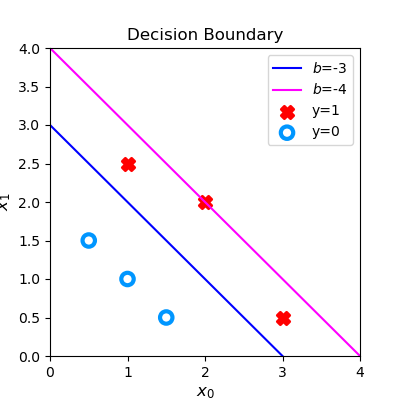

In [12]:
import matplotlib.pyplot as plt

x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

#for decision boundary
# Choose values between 0 and 6
x0 = np.arange(0, 6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# Plot the decision boundary
ax.plot(x0, x1, c="blue", label="$b$=-3")
ax.plot(x0, x1_other, c="magenta", label="$b$=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(x_train, y_train, ax)
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.axis([0, 4, 0, 4])
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

#We can see from this plot that b = -4, w = np.array([1,1]) is a worse model for the training data.
#Let's see if the cost function implementation reflects this.

In [13]:
w_array1 = np.array([1, 1])
b_1 = -3
w_array2 = np.array([1, 1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

#You can see the cost function behaves as expected and the cost for b = -4, w = np.array([1,1]) is indeed higher than the cost for b = -3, w = np.array([1,1])

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461
